# Project 2. Deep Learning
## Image Classification with CNN

#### Sandra Marcela Meneses - Angélica María Gómez Buitrago - Juan Camilo Castillo Castro - Diego Fernando López Castillo

* Conjunto: 600 imágenes con 6 categorías de pájaros. 
* Distribución: 100 imágenes de cada categoría:

# *Punto 1. Direct prediction*

Download the dataset birds from http://www-cvr.ai.uiuc.edu/ponce_grp/data/.
Use Keras and a CNN from Keras Applications pretrained on ImageNet, to classify the images in the birds dataset. Construct a confusion matrix that relates the bird classes with the 10 most frequent classes from ImageNet predicted by the model.
Discuss the results.

## *Introducción:*

#### Librerias

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img,array_to_img,load_img,image
from keras.applications.vgg16 import decode_predictions
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.utils.np_utils import to_categorical

In [57]:
# Only the first training batch and testing  # File is 58MB
import zipfile
for filename in ['birds.zip']:
    print('{:>15}  {}'.format(
        filename, zipfile.is_zipfile(filename)))

zf = zipfile.ZipFile('../Proyecto_Aves/birds.zip', 'r')
zf.extractall(path='../Proyecto_Aves/')

      birds.zip  True


In [58]:
zf.namelist()[0:10]

['birds/',
 'birds/egret/',
 'birds/egret/egr001.jpg',
 'birds/egret/egr002.jpg',
 'birds/egret/egr003.jpg',
 'birds/egret/egr004.jpg',
 'birds/egret/egr005.jpg',
 'birds/egret/egr006.jpg',
 'birds/egret/egr007.jpg',
 'birds/egret/egr008.jpg']

#### Visualización previa de imágenes

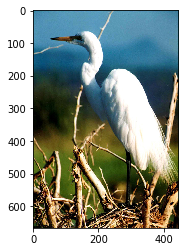

In [60]:
%matplotlib inline

img = load_img('birds/egret/egr006.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img)
plt.show()

#### Ejemplo de generación de imágenes
* Rotación de imagen 

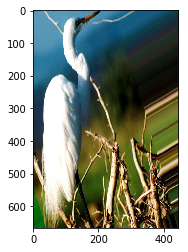

In [61]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('birds/egret/egr006.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, _, _)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, _, _)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely
plt.imshow(batch[0]/255) 
plt.show()

## *Implementación:*

**Explicación 1: ** Se definen los siguientes parámetros:
* Dimensión de las imágenes 
* Directorio de entrada
* Batch_size

In [12]:
img_width, img_height = 224, 224
#top_model_weights_path = 'bottleneck_fc_model.h5'
data_dir = 'birds'
#epochs = 50
batch_size = 16

**Explicación 2:** Se extrae los pesos de la red neuronal pre-entrenada VGG16, especificando el parámetro include_top=true, para implementar el uso de todas las capas.

In [13]:
# build the MobileNet network
model = applications.VGG16(include_top=True, weights='imagenet')

* Estructura de la red VGG16 incluyendo la capa predictions (Dense) (None, 1000)  Param: 4097000

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

**Explicación 3:** Se crea un generador utilizando los parámetros en la -Explicación 1-  
* **-directory=data_dir-**, Garantiza el acceso al directorio con las imagenes de aves
* **-class_mode = None-** significa que el generador solo producirá lotes de datos sin etiquetas 
* **-shuffle    = False-** garantiza que los datos estarán en orden, entonces las primeras 100 imágenes corresponderán a egret, las siguientes 100 a la categoría  owl, y así mismo para las clasificaciones puffin, toucan y wood_duck.  

Puede observarse que encontró 600 imágenes distribuidas en 6 clases


In [16]:
datagen = ImageDataGenerator(rescale=1. / 255) #se reescala para que queden valores entre 0 y 1 
       
generator = datagen.flow_from_directory(
    directory   = data_dir,
    target_size = (img_width, img_height),
    batch_size  = batch_size,
    class_mode  = None,
    shuffle     = False)

Found 600 images belonging to 6 classes.


**Explicación 4:** Se define parámetros adicionales 

* **nb_data_samples** : Número de registros




In [17]:
nb_data_samples    = len(generator.filenames)
print(nb_data_samples)    

600


* **num_classes** : Número de clases

In [18]:
num_classes       = len(generator.class_indices) 
num_classes 

6

* **predict_size ** : Uso de bits en la predicción

In [19]:
predict_size        = int(math.ceil(nb_data_samples / batch_size))
predict_size

38

**Explicación 5:** Predicción utilizando toda la esquematización de la red neuronal VGG16

In [20]:
pred_VGG16          = model.predict_generator(generator, predict_size)

C:\Users\JuanCastillo\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\JuanCastillo\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2652897280 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\JuanCastillo\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2656043008 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\JuanCastillo\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\JuanCastillo\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:7

**Explicación 6:** Predicción en términos de la (Probabilidad)

In [21]:
pred_VGG16

array([[2.4292103e-04, 1.7547646e-03, 4.7920673e-04, ..., 7.3584568e-05,
        2.5899941e-04, 1.5368018e-02],
       [1.4121128e-04, 1.2992924e-03, 6.9615582e-04, ..., 6.8622823e-05,
        2.1611825e-04, 5.8780633e-02],
       [1.4409114e-04, 1.2562366e-03, 5.9210282e-04, ..., 4.2129184e-05,
        2.0432290e-04, 3.3481963e-02],
       ...,
       [1.3925564e-04, 1.9953006e-03, 3.4236422e-04, ..., 5.9400154e-05,
        2.1850648e-04, 3.0012041e-02],
       [3.2806426e-04, 2.6018803e-03, 9.9731609e-04, ..., 5.9557093e-05,
        2.5754279e-04, 3.2504622e-02],
       [2.5932968e-04, 2.6910054e-03, 6.5617356e-04, ..., 6.4959415e-05,
        2.6246166e-04, 1.9830642e-02]], dtype=float32)

**Explicación 7:** Dimensión del vector de predicción: 600 registros x 1000 columnas que corresponden a las categorías para entrenar la red VGG16

In [27]:
pred_VGG16.shape

(600, 1000)

**Explicación 8:** Se decodifica las predicciones incorporando las categorías    

In [37]:
label = decode_predictions(pred_VGG16)
label

[[('n03788365', 'mosquito_net', 0.09943652),
  ('n04209239', 'shower_curtain', 0.020876015),
  ('n03291819', 'envelope', 0.016513709),
  ('n15075141', 'toilet_tissue', 0.015368018),
  ('n04476259', 'tray', 0.012296754)],
 [('n03788365', 'mosquito_net', 0.16956541),
  ('n15075141', 'toilet_tissue', 0.058780633),
  ('n03887697', 'paper_towel', 0.024517825),
  ('n04209239', 'shower_curtain', 0.020473164),
  ('n03291819', 'envelope', 0.014556322)],
 [('n03788365', 'mosquito_net', 0.23483784),
  ('n04209239', 'shower_curtain', 0.034198534),
  ('n15075141', 'toilet_tissue', 0.033481963),
  ('n03291819', 'envelope', 0.015498311),
  ('n03887697', 'paper_towel', 0.012278019)],
 [('n03788365', 'mosquito_net', 0.045364566),
  ('n15075141', 'toilet_tissue', 0.015651459),
  ('n01632777', 'axolotl', 0.014311943),
  ('n02009912', 'American_egret', 0.014034409),
  ('n01737021', 'water_snake', 0.013934333)],
 [('n03788365', 'mosquito_net', 0.34839147),
  ('n04209239', 'shower_curtain', 0.04790015),
  (

**Explicación 9:** Se extrae el vector de categorías 

In [26]:
categoria=[]
for i in range(600): 
    label = decode_predictions(pred_VGG16)[i][2][1]
    categoria.append(label)
    
categoria= np.array(categoria)
categoria

array(['envelope', 'paper_towel', 'toilet_tissue', 'axolotl',
       'toilet_tissue', 'toilet_tissue', 'shower_curtain',
       'shower_curtain', 'stingray', 'shower_curtain', 'shower_curtain',
       'stingray', 'stingray', 'shower_curtain', 'shower_curtain',
       'water_snake', 'stingray', 'shower_curtain', 'water_snake',
       'shower_curtain', 'envelope', 'shower_curtain', 'shower_curtain',
       'envelope', 'stingray', 'stingray', 'water_snake', 'envelope',
       'envelope', 'envelope', 'stingray', 'toilet_tissue',
       'toilet_tissue', 'stingray', 'envelope', 'paper_towel',
       'shower_curtain', 'shower_curtain', 'shower_curtain', 'envelope',
       'paper_towel', 'shower_curtain', 'paper_towel', 'water_snake',
       'shower_curtain', 'toilet_tissue', 'toilet_tissue', 'paper_towel',
       'shower_curtain', 'envelope', 'envelope', 'shower_curtain',
       'shower_curtain', 'toilet_tissue', 'shower_curtain', 'envelope',
       'shower_curtain', 'shower_curtain', 'envelo

**Explicación 10:** Se construye un vector de tamaño 600 con las categorías originales distribuido asi: 

* 100 Repeticiones de "Egret"
* 100 ""   "Mandarin"
* 100 ""   "Owl"
* 100 ""   "Puffin"
* 100 ""   "Toucan"
* 100 ""   "Wood Duck"

In [38]:
x = np.array(["Egret","Mandarin","Owl","Puffin","Toucan","Wood Duck"])
ori_cat = np.repeat(x, [100], axis=0)
ori_cat

array(['Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret',
       'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret',
       'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret',
       'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret',
       'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret',
       'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret',
       'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret',
       'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret',
       'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret',
       'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret',
       'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret',
       'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret',
       'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret',
       'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret', 'Egret',
       'Egret', 'Egr

**Explicación 11:** Construcción de un data frame para las 600 fotos de aves originales y su respectiva predicción

In [40]:
d = {"Original":ori_cat,"Prediction":categoria}
matrix = pd.DataFrame(d)
matrix.head()

,Original,Prediction
0,Egret,envelope
1,Egret,paper_towel
2,Egret,toilet_tissue
3,Egret,axolotl
4,Egret,toilet_tissue


**Explicación 12:** Conteo de las 10 clases más frecuentes en la predicción

In [41]:
counter = matrix.groupby(['Prediction']).size()
counter = counter.sort_values(ascending=False)
counter[:10]

Prediction
shower_curtain    241
toilet_tissue      96
paper_towel        64
envelope           48
stingray           47
water_snake        30
Band_Aid           25
axolotl            16
Samoyed            13
Arctic_fox          4
dtype: int64

**Explicación 13:** Indexación de las 10 clases más frecuentes para ser utilizadas en el filtro desde el data frame **-matrix-**

In [42]:
most_commom = counter[:10].index
most_commom

Index(['shower_curtain', 'toilet_tissue', 'paper_towel', 'envelope',
       'stingray', 'water_snake', 'Band_Aid', 'axolotl', 'Samoyed',
       'Arctic_fox'],
      dtype='object', name='Prediction')

**Explicación 14:** Obtención del data frame final **-matrix_2-** que contiene los insumos para la construcción de la matriz de confusión

In [43]:
matrix_2 = matrix[matrix.Prediction.isin(most_commom)]
matrix_2.shape

(584, 2)

In [45]:
matrix_2.head()

,Original,Prediction
0,Egret,envelope
1,Egret,paper_towel
2,Egret,toilet_tissue
3,Egret,axolotl
4,Egret,toilet_tissue


**Explicación 15:** Definición de los **-labels-** para la matriz de confusión

In [297]:
def Union(lst1, lst2):
    final_list = lst1 + lst2
    return final_list

labels = Union(list(most_commom),["Egret","Mandarin","Owl","Puffin","Toucan","Wood Duck"])
labels

['shower_curtain',
 'toilet_tissue',
 'paper_towel',
 'envelope',
 'stingray',
 'water_snake',
 'Band_Aid',
 'axolotl',
 'Samoyed',
 'Arctic_fox',
 'Egret',
 'Mandarin',
 'Owl',
 'Puffin',
 'Toucan',
 'Wood Duck']

**Explicación 16:** Construcción de la matriz de confusión:

In [299]:
from sklearn.metrics import confusion_matrix 
Original   = matrix_2["Original"]
Prediction = matrix_2["Prediction"]

cm = confusion_matrix(Original , Prediction,labels=labels)
cm

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [38, 11,  7, 17, 10,  7,  1,  3,  4,  0,  0,  0,  0,  0,  0,  0],
       [48, 21, 11,  4,  7,  4,  1,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [29, 10, 32,  2,  9,  4,  1,  0,  4,  2,  0,  0,  0,  0,  0,  0],
       [42, 13, 10, 10,  8,  2,  3,  2,  4,  2,  0,

* Dimensiones de la matriz de confusión:

In [243]:
cm.shape

(16, 16)

* Definición de función para graficar la matriz de confusión:

In [221]:
def plot_confusion_matrix(cm, names, title='MATRIZ DE CONFUSIÓN', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('Clase real')
    plt.xlabel('Clase predicha')

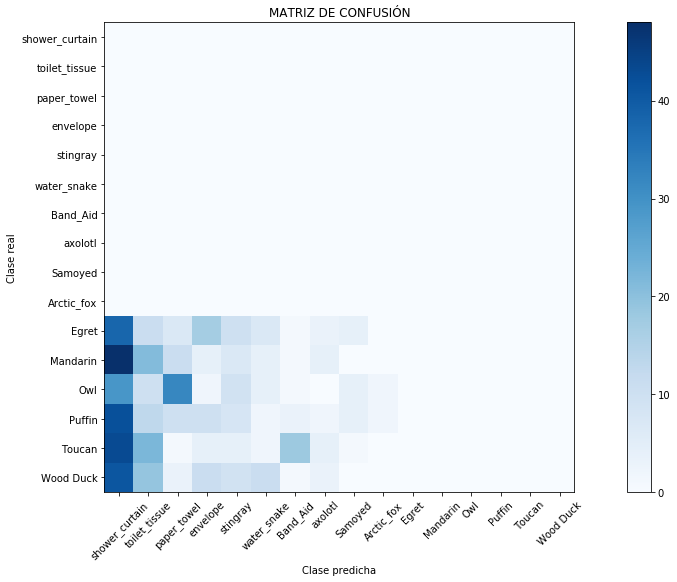

In [300]:
plt.figure(figsize=(15,8))
plot_confusion_matrix(cm,labels)

**Resultado final: ** Es claro que la predicción no es buena para las 600 fotos, esto debido al pre-entrenamiento de la red neuronal VGG16 que no incorporo imágenes explicitas de aves tipo *"Egret","Mandarin","Owl","Puffin","Toucan" y "Wood Duck"*. Como resultado curioso y a modo de ejemplo, vemos que 241 aves fueron clasificadas erráticamente como "Shower_curtain" discriminadas así:

**clasificadas equivocadamente como -shower_curtain-**
* 38 Egret	
* 48 Mandarin	
* 29 Owl	
* 42 Puffin	
* 43 Toucan	
* 41 Wood Duck
